<a href="https://colab.research.google.com/github/orinbou/MathPythonColab/blob/main/chapter/%E7%AC%AC6%E5%9B%9E%E3%80%80%E5%BE%AE%E5%88%86%E6%B3%95%E3%81%AE%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E3%82%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%81%97%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標1： 微分の数値計算を行って導関数をグラフ化しよう

In [ ]:
# 導関数（微分）
def derivative(f, x, h):
  return (f(x+h) - f(x)) / h

def func(x):
  return x**3 - 2 * x**2 + 1

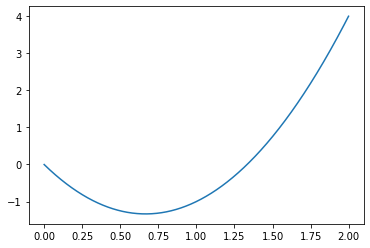

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001
xrange = np.arange(0, 2, h)
data = []

for x in xrange:
  data.append(derivative(func, x, h))

plt.plot(xrange, data)
plt.show()

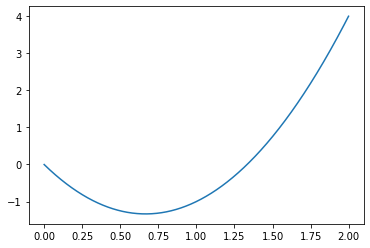

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001
xrange = np.arange(0, 2, h)
data = [derivative(func, x, h) for x in xrange]
plt.plot(xrange, data)
plt.show()

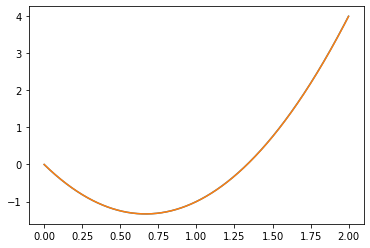

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001
xrange = np.arange(0, 2, h)
data = derivative(func, xrange, h)
plt.plot(xrange, data)
plt.plot(xrange, 3*xrange**2 - 4*xrange)
plt.show()

# 目標2： 微分方程式の数値計算を行う

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dy(x):
  return x**2

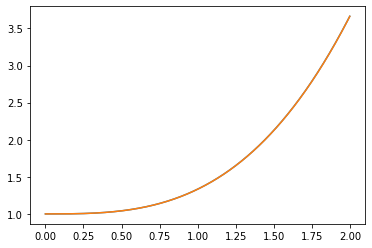

In [ ]:
y = [1] # 初期値
h = 0.001 # 刻み値

for x in np.arange(h, 2, h): # x=0の時y=1と初期値を決めたのでx=0.01から
  y.append(y[-1] + dy(x)*h) # y[-1]は直前に追加したyの（末尾の）値

x = np.arange(0, 2, h)
plt.plot(x, y) # 数値計算でグラフ描画
plt.plot(x, 1/3*x**3+1) # 解析的に解いた式でグラフ描画
plt.show()

# 目標3： ルンゲ・クッタ法を使って微分方程式の数値計算を行う

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dy(x, y):
  return x**2

def RungeKutta(x, y, h):
  k1=dy(x, y)
  k2=dy(x+h/2, y+h*k1/2)
  k3=dy(x+h/2, y+h*k2/2)
  k4=dy(x+h, y+h*k3)
  ky=y+h*(k1+2*k2+2*k3+k4)/6
  return ky

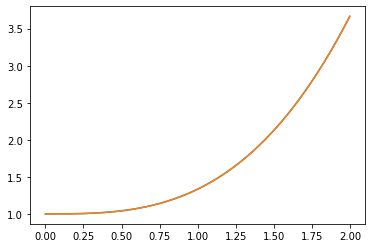

In [ ]:
y=[1]
h = 0.001

for x in np.arange(h, 2, h):
  y.append(RungeKutta(x, y[-1], h))

x = np.arange(0, 2, h)
plt.plot(x, y)
plt.plot(x, 1/3*x**3+1)
plt.show()

## ローレンツの方程式のグラフを描く

In [ ]:
def dx(t, x, y, z):
  return -10 * x + 10 * y

def dy(t, x, y, z):
  return -x * z + 28 * x -y

def dz(t, x, y, z):
  return x * y - 8 / 3 * z

def RungeKutta(t, x, y, z, h):
  kx1 = dx(t, x, y, z)
  ky1 = dy(t, x, y, z)
  kz1 = dz(t, x, y, z)

  kx2 = dx(t+h/2, x+h*kx1/2, y+h*ky1/2, z+h*kz1/2)
  ky2 = dy(t+h/2, x+h*kx1/2, y+h*ky1/2, z+h*kz1/2)
  kz2 = dz(t+h/2, x+h*kx1/2, y+h*ky1/2, z+h*kz1/2)

  kx3 = dx(t+h/2, x+h*kx2/2, y+h*ky2/2, z+h*kz2/2)
  ky3 = dy(t+h/2, x+h*kx2/2, y+h*ky2/2, z+h*kz2/2)
  kz3 = dz(t+h/2, x+h*kx2/2, y+h*ky2/2, z+h*kz2/2)

  kx4 = dx(t+h, x+h*kx3, y+h*ky3, z+h*kz3)
  ky4 = dy(t+h, x+h*kx3, y+h*ky3, z+h*kz3)
  kz4 = dz(t+h, x+h*kx3, y+h*ky3, z+h*kz3)

  kx = x + h*(kx1+2*kx2+2*kx3+kx4)/6 # 次のx
  ky = y + h*(ky1+2*ky2+2*ky3+ky4)/6 # 次のy
  kz = z + h*(kz1+2*kz2+2*kz3+kz4)/6 # 次のz
  return kx, ky, kz

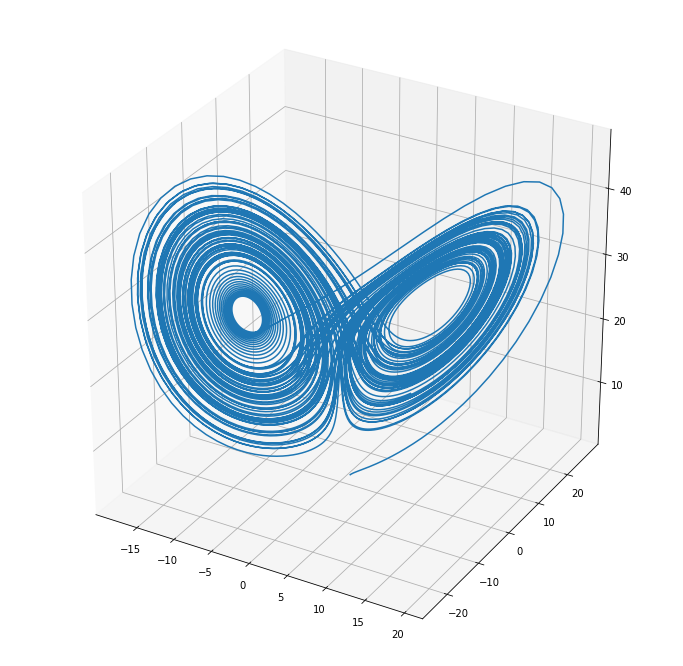

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1] # 初期値の設定
y = [1]
z = [1]
h = 0.01 # 刻み値

for t in np.arange(h, 100, h):
  xt, yt ,zt  = RungeKutta(t, x[-1], y[-1], z[-1], h)
  x.append(xt)
  y.append(yt)
  z.append(zt)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
plt.show()

# 微分法をプログラミングする練習問題

## （1）勾配降下法で関数の最小値を求める

In [ ]:
import random

def func(x):
  return 3*x**2 - 24*x + 331

def derivative(f, x, h):
  return (f(x+h) - f(x)) / h

In [ ]:
h = 0.001
rate = 0.001 # 学習率
random.seed(0) # 毎回同じ結果を得るため乱数の種を指定
a = random.random() # 初期値
coef = 1 # 微分係数（とりあえず1から始める）
count = 0 # 収束までの回数を数えてみる

while abs(coef) > 0.001:
  a -= rate * coef # aの値を更新
  coef = derivative(func, a, h)
  count += 1

print(a, coef, count) # aとその時の微分係数、収束までの回数

3.9993337892878147 -0.0009972642374123097 1638


In [ ]:
h = 0.001
rate = 0.001 # 学習率
random.seed(0) # 毎回同じ結果を得るため乱数の種を指定
a = random.random() # 初期値

coef = derivative(func, a, h) # 微分係数
prev = func(a) # 最初のfunc(a)の値
diff = 1 # 直前の値との差。1から始めることにする
count = 0 # 収束までの回数を数えてみる

while abs(diff) > 1e-8:
  a -= rate * coef # aの値を更新
  coef = derivative(func, a, h)
  curr = func(a)
  diff = prev - curr
  prev = curr
  count += 1

print(a, coef, count) # aとその時の微分係数、収束までの回数

3.9991700306827553 -0.001979815920094552 1523


## （2）2変数の微分方程式をルンゲ・クッタ法で解く

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dy(x, y):
  return x * y # ここを変えるだけ

In [ ]:

def RungeKutta(x, y, h):
  k1=dy(x, y)
  k2=dy(x+h/2, y+h*k1/2)
  k3=dy(x+h/2, y+h*k2/2)
  k4=dy(x+h, y+h*k3)
  ky=y+h*(k1+2*k2+2*k3+k4)/6
  return ky

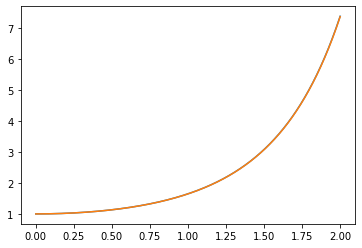

In [ ]:
y=[1]
h = 0.001

for x in np.arange(h, 2, h):
  y.append(RungeKutta(x, y[-1], h))

x = np.arange(0, 2, h)
plt.plot(x, y)
plt.plot(x, np.exp(x**2/2)) # 解析的に解いたグラフも描画
plt.show()

## （3）偏微分の数値計算を行い、平面のグラフを描く

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def partial(f, x, y, h):
  return (f(x+h, y) - f(x-h, y)) / (2*h)

def func(x, y):
  return 4*x**2 + 4*x*y + 2*y**2 + 5

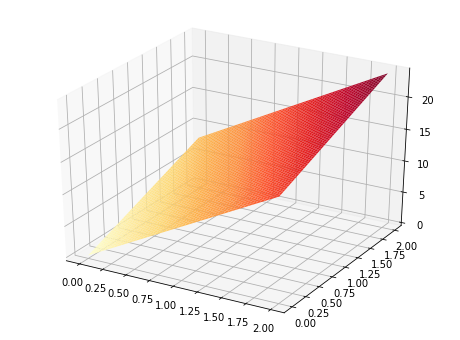

In [ ]:
h = 0.01
xrange = np.arange(0, 2, h)
yrange = np.arange(0, 2, h)
x, y = np.meshgrid(xrange, yrange)
z = partial(func, x, y, h)

# グラフを描画する
plt.figure(figsize=[8, 6])
ax = plt.subplot(projection="3d")
ax.plot_surface(x, y, z, cmap="YlOrRd")
plt.show()